<a href="https://colab.research.google.com/github/kevingray92/ATMS-597_Project6/blob/master/Project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import required modules
!pip install metpy
import metpy.calc
from metpy.units import units
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

     |████████████████████████████████| 327kB 2.8MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 194kB 8.8MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
!git clone https://github.com/kevingray92/ATMS-597_Project6.git

Cloning into 'ATMS-597_Project6'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


# Import and clean data

In [0]:
data = pd.read_csv('./ATMS-597_Project6/decoded_metar_KMSN.csv')
data2 = pd.read_csv('./ATMS-597_Project6/decoded_metar_KGRB.csv')
data3 = pd.read_csv('./ATMS-597_Project6/decoded_metar_KOSH.csv')
data.drop(['Unnamed: 0', 'date_time', 'station_id', 'latitude', 'longitude','date_time.1','current_wx1','past_weather','past_weather2',
           'eastward_wind', 'northward_wind','month','fzn_or_liq'], axis = 1, inplace= True)
data2.drop(['date_time', 'station_id', 'latitude', 'longitude','date_time.1','current_wx1','past_weather','past_weather2', 
           'eastward_wind', 'northward_wind','month','fzn_or_liq'], axis = 1, inplace= True)
data3.drop(['date_time', 'station_id', 'latitude', 'longitude','date_time.1','current_wx1','past_weather','past_weather2', 
           'eastward_wind', 'northward_wind','month','fzn_or_liq'], axis = 1, inplace= True)
data = pd.concat([data,data2,data3])
data.tail()

,elevation,wind_direction,wind_speed,air_temperature,dew_point_temperature,altimeter,present_weather
105651,248.0,30.0,10.0,1.0,-1.0,30.11,71
105652,248.0,20.0,11.0,1.0,-1.0,30.11,71
105653,248.0,20.0,12.0,1.0,-1.0,30.11,71
105654,248.0,20.0,10.0,1.0,-1.0,30.11,71
105655,248.0,20.0,10.0,1.0,-1.0,30.11,71


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
#change directory to the right spot
import os 
os.chdir('/content/gdrive/My Drive/Colab Notebooks/ATMS 597 Projects/Project6')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
data4 = pd.read_csv('decoded_metar_KBUF.csv')
data4.drop(['date_time', 'station_id', 'latitude', 'longitude','date_time.1','current_wx1','past_weather','past_weather2', 
            'eastward_wind', 'northward_wind','month','fzn_or_liq'], axis = 1, inplace= True)
data = pd.concat([data,data4])           
data.tail()

,elevation,wind_direction,wind_speed,air_temperature,dew_point_temperature,altimeter,present_weather
323559,211.0,70.0,6.0,13.0,11.0,29.64,61
323560,211.0,60.0,5.0,13.0,11.0,29.64,61
323561,211.0,60.0,4.0,13.0,11.0,29.64,61
323562,211.0,40.0,3.0,13.0,11.0,29.64,61
323563,211.0,50.0,3.0,13.0,11.0,29.64,61


In [0]:
# calc altimeter pressure and sea level pressure in hpa

altim = data.altimeter.values * units.in_Hg
height = data.elevation.values * units.meter
temp = data.air_temperature.values *units.degC
dew = data.dew_point_temperature.values *units.degC
slp = metpy.calc.altimeter_to_sea_level_pressure(altim,height,temp) 
p = metpy.calc.altimeter_to_station_pressure(altim,height)
p = p.to(units.hectopascal)
slp = slp.to(units.hectopascal)
slp = np.asarray(slp,dtype=float)
p = np.asarray(p,dtype=float)

data['slp'] = slp
data['pressure'] = p
data.drop(['elevation', 'altimeter'], axis = 1, inplace = True)
data.tail()

,wind_direction,wind_speed,air_temperature,dew_point_temperature,present_weather,slp,pressure
323559,70.0,6.0,13.0,11.0,61,1004.090258,979.112475
323560,60.0,5.0,13.0,11.0,61,1004.090258,979.112475
323561,60.0,4.0,13.0,11.0,61,1004.090258,979.112475
323562,40.0,3.0,13.0,11.0,61,1004.090258,979.112475
323563,50.0,3.0,13.0,11.0,61,1004.090258,979.112475


In [0]:
# add wet bulb 
## Keep getting error, not sure how to fix 

#p = data.pressure.values * units.hectopascal
#data['wetbulb'] = metpy.calc.wet_bulb_temperature(p,temp,dew)

## tried this too

#vp = (6.11*(10**((7.5*dew)/(237.7+dew)))) 
#svp = 6.11*(10**((7.5*temp)/(237.7+temp))) 
#rh = (vp/svp)*100
#wetbulb = temp*np.arctan[0.151977 * (rh + 8.313659)**(1/2)] + np.arctan(temp + rh) - np.arctan(rh - 1.676331) + (0.00391838*(rh**(3/2))) * np.arctan(0.023101*rh) - 4.686035

#data.head()

In [0]:
# Check which present weather codes are in our data
data['present_weather'].value_counts()

71    349839
61    315955
63     41145
95     19666
73     14354
65     10280
66      4897
97      4648
75      2920
68      1030
67       625
69         4
Name: present_weather, dtype: int64

In [0]:
# Change present weather codes to read as the actual precip type
# rain = 0, frzrain = 1, snow = 2
data['present_weather'].replace(to_replace=[61, 63, 65, 66, 67, 71, 73, 75], value= [0, 0, 0, 1, 1, 2, 2, 2], inplace=True)

# drop thunderstorms and rain/snow mix
data = data[data.present_weather != 68]
data = data[data.present_weather != 69]
data = data[data.present_weather != 95]
data = data[data.present_weather != 97]
data.head()

,wind_direction,wind_speed,air_temperature,dew_point_temperature,present_weather,slp,pressure
0,320.0,6.0,-6.0,-9.0,2,1015.875603,982.529161
1,340.0,7.0,-5.0,-9.0,2,1015.749167,982.529161
2,330.0,10.0,-5.0,-10.0,2,1015.749167,982.529161
3,320.0,8.0,-6.0,-10.0,2,1016.217042,982.859392
4,320.0,8.0,-6.0,-10.0,2,1016.217042,982.859392


In [0]:
data['present_weather'].value_counts()

0    367380
2    367113
1      5522
Name: present_weather, dtype: int64

In [0]:
# resample data to have 5500 cases of each precip type

data0 = pd.DataFrame(data.loc[data['present_weather'] == 0])
data1 = pd.DataFrame(data.loc[data['present_weather'] == 1])
data2 = pd.DataFrame(data.loc[data['present_weather'] == 2])

data0 = pd.DataFrame(data0.sample(n = 5500))
data1 = pd.DataFrame(data1.sample(n = 5500))
data2 = pd.DataFrame(data2.sample(n = 5500))

data = pd.concat([data0, data1, data2])
data   

,wind_direction,wind_speed,air_temperature,dew_point_temperature,present_weather,slp,pressure
35121,250.0,12.0,18.0,17.0,0,1013.520057,988.735339
289771,190.0,15.0,6.0,3.0,0,1018.344941,992.385486
59079,200.0,5.0,4.0,2.0,0,1012.947828,980.878016
169114,230.0,8.0,5.0,3.0,0,994.077326,962.716296
43491,240.0,11.0,6.0,0.0,0,1012.546560,987.097255
...,...,...,...,...,...,...,...
39879,340.0,11.0,-3.0,-8.0,2,1025.015154,998.026724
55600,250.0,5.0,-17.0,-20.0,2,1007.697185,980.126972
144987,260.0,13.0,-1.0,-5.0,2,999.600044,973.471655
158883,270.0,4.0,-2.0,-4.0,2,1013.668752,987.076199


# Logistic Regression model


In [0]:
#split dataset into features and target variable
cols = ['wind_direction', 'wind_speed',	'air_temperature', 'dew_point_temperature',	'slp',	'pressure']

X = data[cols] #features
y = data.present_weather # Target variable

# Scale X matrix
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# Build and fit logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class='multinomial', solver='newton-cg')

# fit the model with data
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

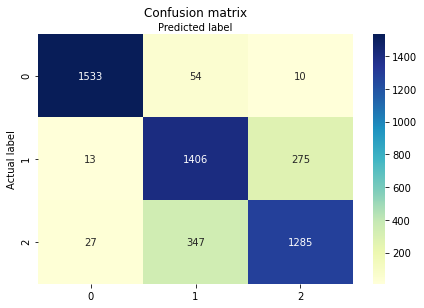

In [0]:
# Construct confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Plot confusion matrix
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
# Accuracy metric 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8533333333333334


# Neural Network

In [0]:
#load nn packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

#build nn model
model = keras.Sequential([
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(3)
])

#using Adam optimizer with hyperperamaters from example. haven't done testing with this yet
model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.001, beta_1=0.9, 
                                                 beta_2=0.999, epsilon=1e-07, amsgrad=False),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics='accuracy')

#fit model
history = model.fit(X_train, y_train, epochs=50, validation_split = 0.1)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

Epoch 1/50

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

325/325 [==============================] - 1s 2ms/step - loss: 0.3957 - accuracy: 0.8355 - val_loss: 0.3613 - val_accuracy: 0.8450
Epoch 2/50
325/325 [==============================] - 1s 2ms/step - loss: 0.3187 - accuracy: 0.8663 - val_loss: 0.3450 - val_accuracy: 0.8580
Epoch 3/50
325/325 [==============================] - 1s 2ms/step - loss: 0.2947 - accuracy: 0.8772 - val_loss: 0.3181 - val_accuracy: 0.8710
Epoch 4/50
325/325 [==============================] - 1s 2ms/step - loss: 0.2842 -

(0.0, 1.0)

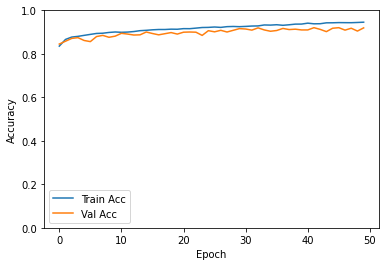

In [0]:
#plotting accuracy over time for training and validation
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(hist['epoch'], hist['accuracy'], label='Train Acc')
plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Acc')
plt.legend()
plt.ylim([0,1])

In [0]:
#evaluate accuracy
test_loss, test_acc = model.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)

155/155 [==============================] - 0s 1ms/step - loss: 0.2350 - accuracy: 0.9210

Test accuracy: 0.9210100769996643


In [0]:
#give output as percentages, easier to read
prob_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

#make predictions
nn_pred = prob_model.predict(X_test)

nn_pred[0] #for each prediction, it returns an array of probabilities of each classification. 
           #the highest probability is the predicted classification for that data point

array([1.0322632e-06, 6.7387015e-01, 3.2612875e-01], dtype=float32)

In [0]:
#array to store predicitions from model.predict
nn_pred_lab = []
for i in range(len(nn_pred)):
  nn_pred_lab.append(np.argmax(nn_pred[i])) #finds the maximum probability for data point[i] and adds the corresponding prediction to the new array

#this is the prediction array with the actual labels, used to compare in the confusion matrix
nn_pred_lab

[1,
 2,
 1,
 1,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 0,
 2,
 2,
 1,
 1,
 1,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 2,
 0,
 1,
 0,
 2,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 0,
 2,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 0,
 2,
 2,
 0,
 1,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 1,
 1,
 0,
 1,
 1,
 2,
 2,
 0,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 0,
 0,
 2,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 2,
 0,
 1,
 2,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 2,
 0,
 0,
 1,
 0,
 2,
 0,
 2,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 1,
 1,
 2,
 0,
 2,
 2,
 0,
 2,
 1,
 0,
 1,
 2,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 2,


Text(0.5, 257.44, 'Predicted label')

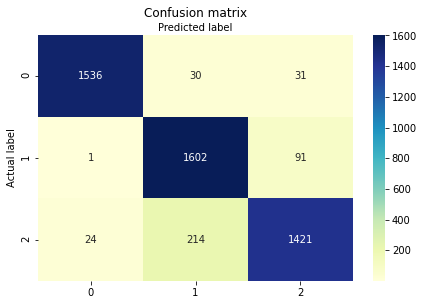

In [0]:
# Same confusion matrix code from earlier
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, nn_pred_lab)

# Plot confusion matrix
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')